
===== Disease Prediction Menu =====
1. Diabetes Prediction
2. Heart Disease Prediction
3. Exit

Dataset Shape: (520, 17)
Columns: ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

Dataset Statistics (Numeric Columns):
                    count      mean       std  min       25%       50%  \
Age                 520.0  0.432822  0.164209  0.0  0.310811  0.425676   
Gender              520.0  0.630769  0.483061  0.0  0.000000  1.000000   
Polyuria            520.0  0.496154  0.500467  0.0  0.000000  0.000000   
Polydipsia          520.0  0.448077  0.497776  0.0  0.000000  0.000000   
sudden weight loss  520.0  0.417308  0.493589  0.0  0.000000  0.000000   
weakness            520.0  0.586538  0.492928  0.0  0.000000  1.000000   
Polyphagia          520.0  0.455769  0.498519  0.0  0.000000  0.00

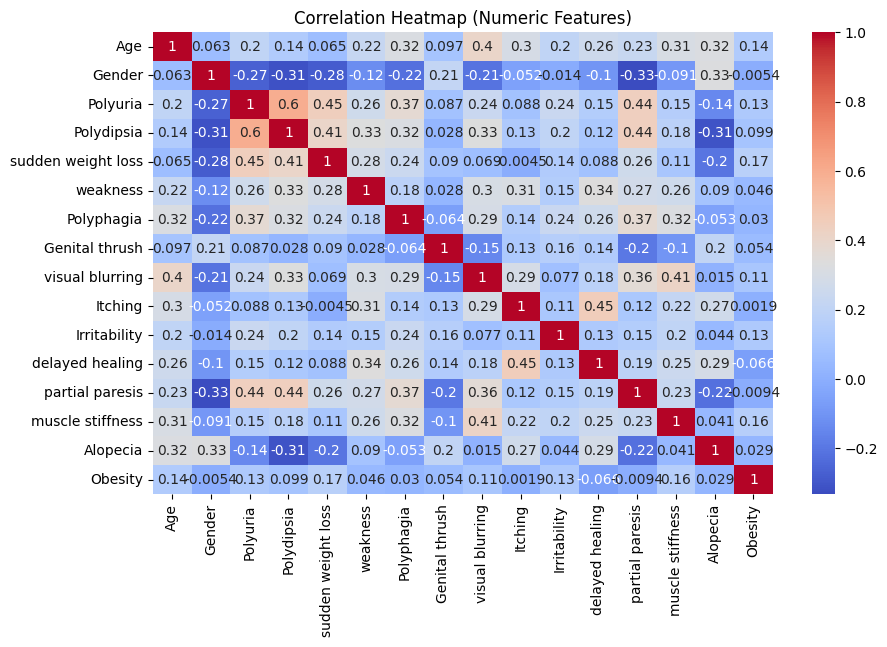


Model Performance:
Logistic Regression Accuracy: 0.933
Random Forest Accuracy: 0.99

Best model selected: Random Forest

--- Patient Prediction ---
Enter value for Gender from: ['Female', 'Male']
Enter value for Polyuria from: ['No', 'Yes']
Enter value for Polydipsia from: ['No', 'Yes']
Enter value for sudden weight loss from: ['No', 'Yes']
Enter value for weakness from: ['No', 'Yes']
Enter value for Polyphagia from: ['No', 'Yes']
⚠️ Invalid input, using default 'No'
Enter value for Genital thrush from: ['No', 'Yes']
Enter value for visual blurring from: ['No', 'Yes']
Enter value for Itching from: ['No', 'Yes']
Enter value for Irritability from: ['No', 'Yes']
Enter value for delayed healing from: ['No', 'Yes']
Enter value for partial paresis from: ['No', 'Yes']
Enter value for muscle stiffness from: ['No', 'Yes']
Enter value for Alopecia from: ['No', 'Yes']
Enter value for Obesity from: ['No', 'Yes']

Processing prediction...

Prediction: Positive
Diagnosis: The patient shows signs of

In [ ]:
# ===============================
# Disease Prediction System (Diabetes / Heart Disease)
# ===============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time   # for sleep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def disease_prediction():
    # ===============================
    # 2. Menu Selection
    # ===============================
    print("\n===== Disease Prediction Menu =====")
    print("1. Diabetes Prediction")
    print("2. Heart Disease Prediction")
    print("3. Exit")
    choice = input("Enter your choice (1, 2 or 3): ").strip()

    # ===============================
    # Exit Option
    # ===============================
    if choice == "3":
        return "exit"

    # ===============================
    # 3. Load Dataset based on choice
    # ===============================
    num_cols = []

    if choice == "1":
        url = "diabetes_data.csv"
        data = pd.read_csv(url)
        target_col = "class"

        # Encode categorical features
        le_dict = {}
        for col in data.columns:
            if data[col].dtype == 'object' and col != target_col:
                le = LabelEncoder()
                data[col] = le.fit_transform(data[col])
                le_dict[col] = le

        num_cols = ["Age"]
        scaler = MinMaxScaler()
        data[num_cols] = scaler.fit_transform(data[num_cols])

    elif choice == "2":
        url = "diabetes_data_heart.csv"
        data = pd.read_csv(url)
        target_col = "class"

        # Encode categorical features
        le_dict = {}
        for col in data.columns:
            if data[col].dtype == 'object' and col != target_col:
                le = LabelEncoder()
                data[col] = le.fit_transform(data[col])
                le_dict[col] = le

        num_cols = ["Age"]
        scaler = MinMaxScaler()
        data[num_cols] = scaler.fit_transform(data[num_cols])

    else:
        print("Invalid choice. Returning to menu...")
        return "invalid"

    # ===============================
    # 4. Features & Target Split
    # ===============================
    X = data.drop(target_col, axis=1)
    target_encoder = LabelEncoder()
    y = target_encoder.fit_transform(data[target_col])

    # ===============================
    # 5. EDA + Statistics
    # ===============================
    print("\nDataset Shape:", data.shape)
    print("Columns:", list(data.columns))

    print("\nDataset Statistics (Numeric Columns):")
    print(data.describe().transpose())

    print("\nDataset Statistics (Including Categorical Columns):")
    print(data.describe(include='all').transpose())

    numeric_data = X.select_dtypes(include=[np.number])
    if numeric_data.shape[1] > 1:
        plt.figure(figsize=(10,6))
        sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap (Numeric Features)")
        plt.show()
    else:
        print("\nSkipping correlation heatmap (not enough numeric columns).")

    # ===============================
    # 6. Model Training
    # ===============================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    log_model = LogisticRegression(max_iter=500)
    log_model.fit(X_train, y_train)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # ===============================
    # 7. Evaluation
    # ===============================
    log_acc = accuracy_score(y_test, log_model.predict(X_test))
    rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

    print("\nModel Performance:")
    print("Logistic Regression Accuracy:", round(log_acc, 3))
    print("Random Forest Accuracy:", round(rf_acc, 3))

    best_model = rf_model if rf_acc > log_acc else log_model
    print("\nBest model selected:", "Random Forest" if rf_acc > log_acc else "Logistic Regression")

    # ===============================
    # 8. User Input Prediction (Fixed for Gender & Yes/No)
    # ===============================
    print("\n--- Patient Prediction ---")
    user_data = {}

    for col in X.columns:
        if col in num_cols:
            val = float(input(f"Enter numeric value for {col}: "))
        else:
            if col in le_dict:
                classes = le_dict[col].classes_
                print(f"Enter value for {col} from: {list(classes)}")
                val_input = input(f"{col}: ").strip().lower()

                # Map Yes/No columns
                if set(classes) == set(['No', 'Yes']):
                    if val_input in ['y', 'yes', 'haan', 'ha', 'han']:
                        val_input = 'Yes'
                    elif val_input in ['n', 'no', 'nai', 'nahi']:
                        val_input = 'No'
                    else:
                        print(f"⚠️ Invalid input, using default '{classes[0]}'")
                        val_input = classes[0]

                # Map Gender
                elif set(classes) == set(['Male', 'Female']):
                    if val_input in ['m', 'male']:
                        val_input = 'Male'
                    elif val_input in ['f', 'female']:
                        val_input = 'Female'
                    else:
                        print(f" Invalid input, using default '{classes[0]}'")
                        val_input = classes[0]

                val = le_dict[col].transform([val_input])[0]

            else:
                # fallback
                val_input = input(f"Enter value for {col} (Yes/No): ").strip().lower()
                if val_input in ["yes", "y", "haan", "ha", "han"]:
                    val = 1
                elif val_input in ["no", "n", "nai", "nahi"]:
                    val = 0
                else:
                    print(" Invalid input, assuming 'No'")
                    val = 0

        user_data[col] = val

    user_df = pd.DataFrame([user_data])
    user_df[num_cols] = scaler.transform(user_df[num_cols])

    print("\nProcessing prediction...")
    time.sleep(2)

    pred = best_model.predict(user_df)[0]
    result = target_encoder.inverse_transform([pred])[0]

    print("\nPrediction:", result)

    if result in [1, "Positive", "Yes"]:
        print("Diagnosis: The patient shows signs of having the disease.")
    else:
        print("Diagnosis: The patient does not show strong signs of the disease.")

    return "done"

# ===============================
# 9. Repeat or Exit Function
# ===============================
while True:
    status = disease_prediction()
    if status == "exit":
        print("Exiting... Stay healthy! 😊")
        break

    again = input("\nDo you want to make another prediction? (yes/no): ").strip().lower()
    if again not in ["yes", "y"]:
        print("Exiting... Stay healthy! 😊")
        break
